#### Set up

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

#### Load Data

In [3]:
diamonds = sns.load_dataset('diamonds')

#### Exam Data

In [4]:
diamonds.shape
diamonds.head()
diamonds.describe()
diamonds['cut'].cat.categories
diamonds['color'].cat.categories
diamonds['clarity'].cat.categories


(53940, 10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Index(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype='object')

Index(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype='object')

Index(['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'], dtype='object')

#### Categorical Values Manipulate

In [5]:
clarity_map ={"clarity":{"VVS1":"VVS","VVS2":"VVS","VS1":"VS","VS2":"VS","SI2":"SI","SI1":"SI"}}
new_diamonds = diamonds.replace(clarity_map)
color_dict = {"D":"Colorless","E":"Colorless","F":"Colorless",
              "G":"Near Colorless","H":"Near Colorless","I":"Near Colorless","J":"Near Colorless"}
new_diamonds["color grade"] = new_diamonds["color"].apply(lambda x:color_dict[x])

new_diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,color grade
0,0.23,Ideal,E,SI,61.5,55.0,326,3.95,3.98,2.43,Colorless
1,0.21,Premium,E,SI,59.8,61.0,326,3.89,3.84,2.31,Colorless
2,0.23,Good,E,VS,56.9,65.0,327,4.05,4.07,2.31,Colorless
3,0.29,Premium,I,VS,62.4,58.0,334,4.20,4.23,2.63,Near Colorless
4,0.31,Good,J,SI,63.3,58.0,335,4.34,4.35,2.75,Near Colorless


#### One hot encoding

In [6]:
one_hot_encoded_diamonds = pd.get_dummies(diamonds)
one_hot_encoded_diamonds.head()

,carat,depth,table,price,x,y,z,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,0.23,61.5,55.0,326,3.95,3.98,2.43,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,1,0,...,1,0,0,0,0,0,1,0,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,0,0,...,0,1,0,0,0,0,0,0,1,0


#### Correlation Matrix

<Figure size 2000x2000 with 0 Axes>

<Axes: >

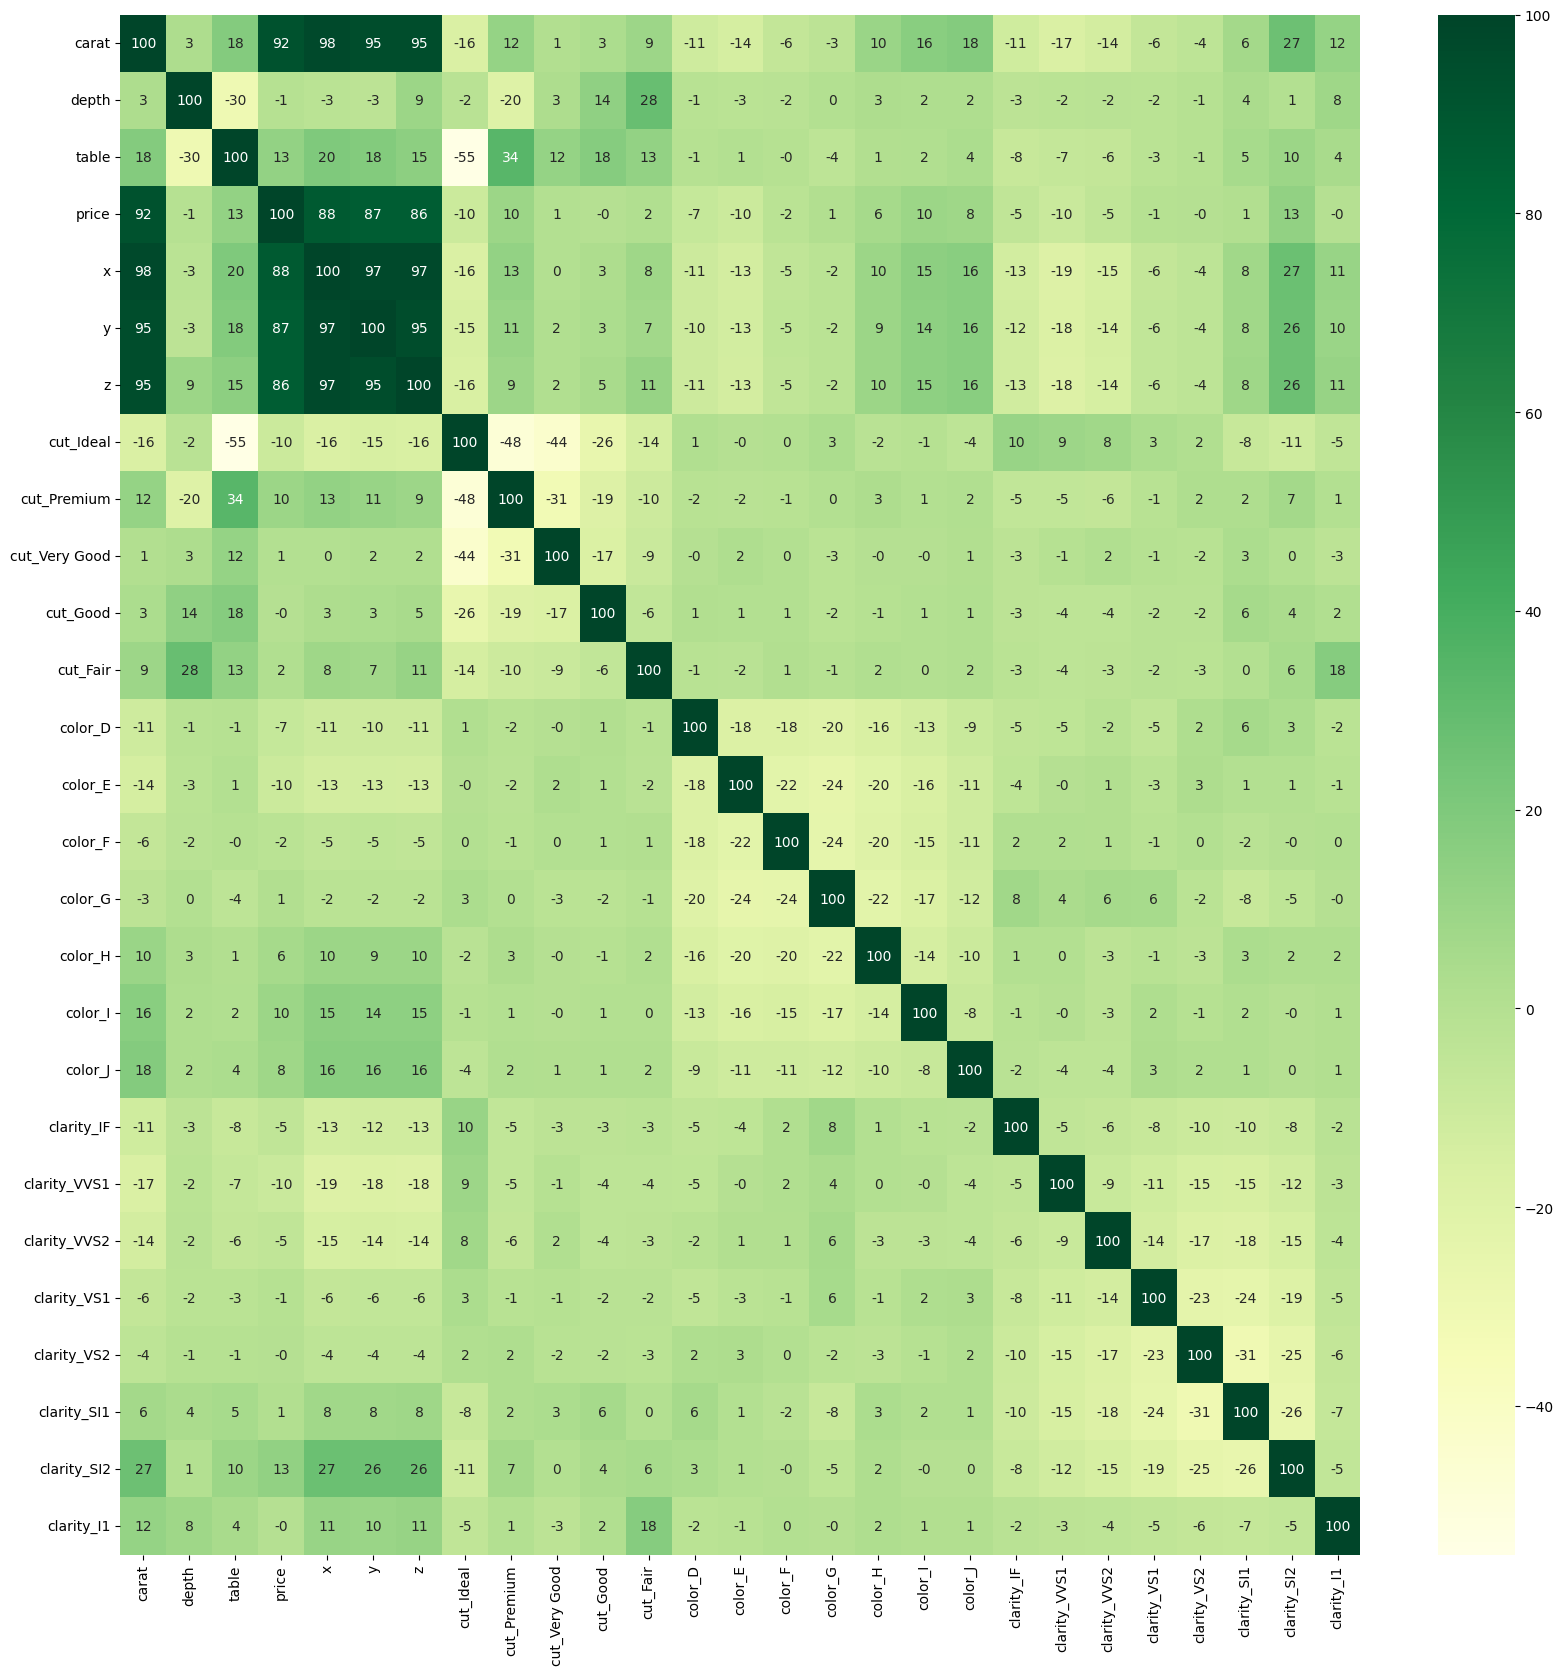

In [7]:
plt.figure(figsize=(20, 20))
corr = one_hot_encoded_diamonds.corr()
sns.heatmap(corr*100, cmap="YlGn", annot= True, fmt=".0f")

#### Independent Variables X and dependent Variable y

In [8]:
X = one_hot_encoded_diamonds.drop(["price"], axis= 1).astype(float)
y = one_hot_encoded_diamonds['price'].astype(float)
X.head()
y.head()

,carat,depth,table,x,y,z,cut_Ideal,cut_Premium,cut_Very Good,cut_Good,...,color_I,color_J,clarity_IF,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,0.23,61.5,55.0,3.95,3.98,2.43,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.21,59.8,61.0,3.89,3.84,2.31,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.23,56.9,65.0,4.05,4.07,2.31,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.29,62.4,58.0,4.20,4.23,2.63,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.31,63.3,58.0,4.34,4.35,2.75,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


0    326.0
1    326.0
2    327.0
3    334.0
4    335.0
Name: price, dtype: float64

#### Packages for Model Building

In [9]:
# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor



# Building everything
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Saving the model
import pickle
print("done")

done


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 42)

X_train.shape
X_test.shape
y_train.shape
y_test.shape

(40455, 26)

(13485, 26)

(40455,)

(13485,)

#### Create Pipelines and Hyperparameters

In [11]:
pipelines = {
    "RandonForest": make_pipeline(StandardScaler(), RandomForestRegressor(random_state=42)),
    "GradientBoosting": make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=42))
}

rf_hyperparameters = {
    "randomforestregressor__n_estimators": [100, 200],
    "randomforestregressor__max_features": ["sqrt", 0.33]
}
gb_hyperparameters = {
    "gradientboostingregressor__n_estimators": [100, 200],
    'gradientboostingregressor__learning_rate': [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth': [1, 3, 5]
}
hyperparameters = {"RandonForest": rf_hyperparameters,
                   "GradientBoosting": gb_hyperparameters}

#### Fit models

In [12]:
fitted_models = {}

for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv= 10, n_jobs= -1)
    model.fit(X_train, y_train)
    fitted_models[name] = model
    print(name, 'model done.')

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_features': ['sqrt', 0.33],
                         'randomforestregressor__n_estimators': [100, 200]})

RandonForest model done.


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('gradientboostingregressor',
                                        GradientBoostingRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'gradientboostingregressor__learning_rate': [0.05, 0.1,
                                                                      0.2],
                         'gradientboostingregressor__max_depth': [1, 3, 5],
                         'gradientboostingregressor__n_estimators': [100, 200]})

GradientBoosting model done.


r2 score on the training set

In [13]:
for name, model in fitted_models.items():
    print(name, model.best_score_)

RandonForest 0.9802179507509793
GradientBoosting 0.9806085892895785


Errors on Test set

In [19]:
for name, model in fitted_models.items():
    print(name+":")
    print("-----------")
    pred = model.predict(X_test)
    print('Mean Absolute Error:',"\n",mean_absolute_error(y_test, pred))
    print("Mean Squared Error:","\n",mean_squared_error(y_test, pred))
    

RandonForest:
-----------
Mean Absolute Error: 
 273.23020497172047
Mean Squared Error: 
 300459.3091847879
GradientBoosting:
-----------
Mean Absolute Error: 
 286.84753076120285
Mean Squared Error: 
 310146.59024264995


Plotting actual and predicted

Text(0.5, 0, 'Actual')

Text(0, 0.5, 'Predicted')

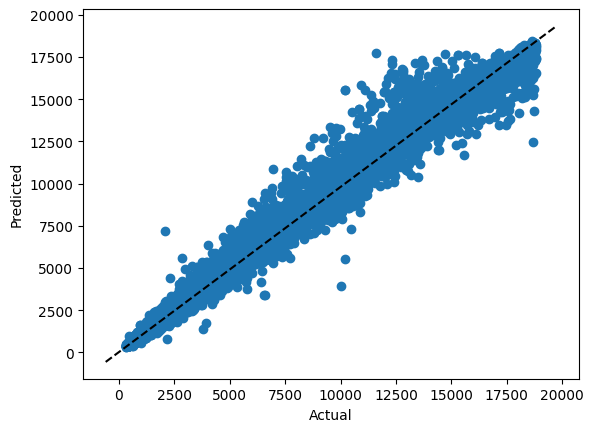

In [20]:
plt.scatter(y, fitted_models["RandonForest"].predict(X))
plt.xlabel("Actual")
plt.ylabel("Predicted")
x_lim = plt.xlim()
y_lim = plt.ylim()
plt.plot(x_lim, y_lim, "k--")
plt.show()